In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

## Creating the DataBunch for the language model

At first, getting the csv file with the texts.

In [4]:
! git clone https://github.com/thiagodma/Similarity-ANEEL

Cloning into 'Similarity-ANEEL'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 51 (delta 23), reused 34 (delta 13), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [9]:
df = pd.read_csv('./LanguageModelFile.csv', delimiter='|')
lst = [x for x in df['Norma'] if 'RES' in x]

['RES - RESOLUÇÃO CONJUNTA 005/2016',
 'RES - RESOLUÇÃO CONJUNTA 004/2014',
 'RES - RESOLUÇÃO CONJUNTA 003/2010',
 'RES - RESOLUÇÃO 001/2004',
 'RES - RESOLUÇÃO 004/2000',
 'RES - RESOLUÇÃO 001/2000',
 'RES - RESOLUÇÃO CONJUNTA 001/1999',
 'RES - RESOLUÇÃO 003/2001',
 'RES - RESOLUÇÃO 004/1999',
 'RES - RESOLUÇÃO CONJUNTA 002/2001',
 'RES - RESOLUÇÃO 005/2000',
 'RES - RESOLUÇÃO 002/2001',
 'RES - RESOLUÇÃO 003/2000',
 'RES - RESOLUÇÃO 001/1998',
 'RES - RESOLUÇÃO 003/1999',
 'RES - RESOLUÇÃO 002/2000',
 'RES - RESOLUÇÃO 005/1998',
 'RES - RESOLUÇÃO 002/1999',
 'RES - RESOLUÇÃO 002/1998',
 'RES - RESOLUÇÃO 006/2000',
 'RES - RESOLUÇÃO 007/2002',
 'RES - RESOLUÇÃO 006/1998',
 'RES - RESOLUÇÃO 007/2000',
 'RES - RESOLUÇÃO 010/2003',
 'RES - RESOLUÇÃO 008/2000',
 'RES - RESOLUÇÃO 010/2002',
 'RES - RESOLUÇÃO 007/1998',
 'RES - RESOLUÇÃO 008/1998',
 'RES - RESOLUÇÃO 010/2000',
 'RES - RESOLUÇÃO 009/2003',
 'RES - RESOLUÇÃO 010/1999',
 'RES - RESOLUÇÃO 010/1998',
 'RES - RESOLUÇÃO 009/2000'

In [6]:
df.isnull().sum()

Unnamed: 0             0
Norma                  0
Data de publicação     0
Ementa                 0
Órgão de origem        0
Assuntos               0
Texto Integral         0
Tipo                   0
Filename               0
Texto Extraído        12
dtype: int64

Here it was identified that exist NaN cells in the DataFrame, whose colunms should be stripped.

In [7]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0            0
Norma                 0
Data de publicação    0
Ementa                0
Órgão de origem       0
Assuntos              0
Texto Integral        0
Tipo                  0
Filename              0
Texto Extraído        0
dtype: int64

In [8]:
df.to_csv(r'./LanguageModelFile.csv', sep='|')

In [9]:
data_lm = TextLMDataBunch.from_csv('.','LanguageModelFile.csv',delimiter='|',text_cols='Texto Extraído',label_cols='Assuntos')
# The first two parameters are the path to the csv (current directory) and the csv name.

#data_lm.save('data_lm')

In [10]:
data_lm.show_batch()

idx,text
0,"em exercício , no uso de suas atribuições regimentais , conforme xxmaj portaria xxup aneel nº 8 , de 30 de janeiro de 2003 , de acordo com a deliberação da xxmaj diretoria , tendo em vista o disposto nos incisos xxup iv e v , art . 11 , da xxmaj lei no 9.074 , de 7 de julho de 1995 , no inciso x , art . 4o"
1,"relatório xxmaj voto o xxup diretor - xxup geral xxup substituto xxup da xxup agência xxup nacional xxup de xxup energia xxup elétrica - xxup aneel , conforme xxmaj portaria nº 845 , de 22 de janeiro de 2008 , no uso de suas atribuições regimentais , de acordo com deliberação da xxmaj diretoria , tendo em vista o disposto no art . 3º , inciso x , da xxmaj"
2,"xxmaj médio xxmaj baixo xxmaj alto a b b xxmaj médio b c c xxmaj baixo b c c xxup anexo xxup ii xxup critérios xxup para xxup classificação xxup de xxup barragens xxbos xxup agência xxup nacional xxup de xxup energia xxup elétrica - xxup aneel xxup resolução xxmaj no 387 , xxup de 10 xxup de xxup setembro xxup de 2001 . xxmaj autoriza a empresa xxmaj termocabo"
3,"acionista pessoa física , constando o nome ou razão social , obedecendo às seguintes regras ; 2.1 o organograma deverá apresentar as participações diretas e indiretas , até seu último nível ; 2.2 a abertura deve considerar todo tipo de participação , inclusive minoritária , superior a 5 % ( cinco por cento ) ; e 2.3 . xxmaj as participações inferiores a 5 % ( cinco por cento )"
4,"quaisquer outras obrigações relacionadas ou decorrentes da exploração da xxup pch ; e , xxup xvi - comunicar à xxup aneel a transferência do controle acionário da empresa , para fins de averbação da respectiva transferência , no prazo máximo de trinta dias após a efetivação da mesma . xxmaj art . 4o xxmaj constituem direitos da autorizada : i - contratar livremente os estudos , projetos , o fornecimento"


In [11]:
data_lm.save('data_lm')

## Training the Language Model

In [12]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.3, pretrained=False, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.20E-02


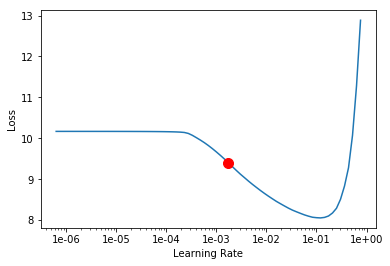

In [13]:
learn_lm.lr_find()
learn_lm.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,6.078541,5.922102,0.091481,03:06
1,5.807777,5.561974,0.119674,03:10
2,4.581632,4.183135,0.273384,03:10
3,3.324579,3.077833,0.453495,03:11
4,2.625103,2.495947,0.549500,03:11
5,2.374835,2.260258,0.579716,03:11
6,2.172401,2.113826,0.602269,03:11
7,2.086641,1.996280,0.620850,03:11
8,1.779499,1.942931,0.630585,03:11
9,1.789277,1.888872,0.639773,03:11


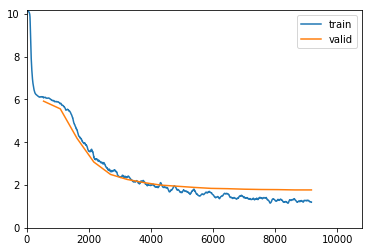

Better model found at epoch 0 with accuracy value: 0.09148062765598297.
Better model found at epoch 1 with accuracy value: 0.11967387050390244.
Better model found at epoch 2 with accuracy value: 0.2733837068080902.
Better model found at epoch 3 with accuracy value: 0.45349499583244324.
Better model found at epoch 4 with accuracy value: 0.5494997501373291.
Better model found at epoch 5 with accuracy value: 0.5797164440155029.
Better model found at epoch 6 with accuracy value: 0.6022694110870361.
Better model found at epoch 7 with accuracy value: 0.6208499073982239.
Better model found at epoch 8 with accuracy value: 0.6305846571922302.
Better model found at epoch 9 with accuracy value: 0.639773428440094.
Better model found at epoch 10 with accuracy value: 0.6474744081497192.
Better model found at epoch 11 with accuracy value: 0.6508618593215942.
Better model found at epoch 12 with accuracy value: 0.6565805077552795.
Better model found at epoch 13 with accuracy value: 0.6587424874305725.


KeyboardInterrupt: 

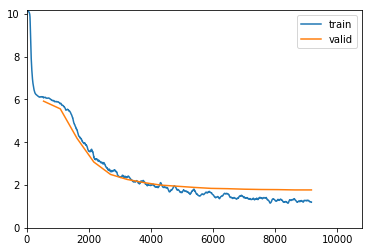

In [14]:
max_lr = 1.74E-03
learn_lm.fit_one_cycle(20, max_lr=slice(max_lr), moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm')])

In [15]:
#Load the best version of the language model
learn_lm.load('learn_lm')
learn_lm.save_encoder('enc')

In [16]:
#Seeing what kind of text it generates
print(learn_lm.predict('Art. 1º Esta resolução visa',n_words=200,temperature=0.8))

Art. 1º Esta resolução visa , em até 28 de março de 2002 , a Resolução ANEEL nº 162 , de 29 de outubro de 2002 , a Resolução nº 233 , de 24 de agosto de 1999 . Art . 4º Esta Resolução entra em vigor na data de sua publicação . JOSÉ MÁRIO MIRANDA ABDO Este texto não substitui o publicado no D.O de 14.01.2000 , seção 1 , p. 29 , v. 138 , n. 10-E. xxbos AGÊNCIA NACIONAL DE ENERGIA ELÉTRICA - ANEEL RESOLUÇÃO Nº 21 , DE 9 DE JANEIRO DE 1998 . o DIRETOR - GERAL DA AGÊNCIA NACIONAL DE ENERGIA ELÉTRICA - ANEEL , no uso de suas atribuições regimentais , tendo em vista Deliberação da Diretoria e de conformidade com o disposto nos incisos XXXI do item do Anexo i do Decreto nº 2.335 , de 06 de outubro de 1997 , e o que consta do Processo nº 48500.001006 / 02 - 01 , resolve :


In [17]:
#Seeing what kind of text it generates
print(learn_lm.predict('Art. 2º Esta resolução visa',n_words=200,temperature=0.3))

Art. 2º Esta resolução visa em vigor a partir de 30 de março de 2003 . JOSÉ MÁRIO MIRANDA ABDO Este texto não substitui o publicado no D.O de 09.04.2003 , seção 1 , p. 82 , v. 140 , n. 69 . xxbos AGÊNCIA NACIONAL DE ENERGIA ELÉTRICA - ANEEL RESOLUÇÃO Nº 16 , DE 31 DE JANEIRO DE 2002 . Autoriza a empresa Construtora Barbosa Mello S.A. a estabelecer - se como Produtor Independente de Energia Elétrica , mediante a exploração da central geradora termelétrica Alta Mogiana , localizada no Município de São José do Rio Claro , Estado de São Paulo . Relatório de Voto o DIRETOR - GERAL DA AGÊNCIA NACIONAL DE ENERGIA ELÉTRICA - ANEEL , no uso de suas atribuições regimentais , de acordo com deliberação da Diretoria , tendo em vista o disposto no art . 11 da Lei no 9.074 , de 7 de julho de 1995


## Now, extracting the vector representation of the texts

In [3]:
#loading de list with all the texts that I want to get the representation
normas = list(pd.read_csv('LanguageModelFile.csv',sep='|',encoding='utf-8')['Texto Extraído'])

In [4]:
data_lm = load_data('.',file='data_lm')
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)
learn_lm.load('learn_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1252 items)
x: LMTextList
xxbos xxup agência xxup nacional xxup de xxup energia xxup elétrica - xxup aneel xxup resolução xxup no 335 , xxup de 14 xxup de xxup julho xxup de 2003 xxmaj homologa as tarifas de fornecimento de energia elétrica da xxup jarcel xxmaj celulose s / xxup a. o xxup diretor - xxup geral xxup da xxup agência xxup nacional xxup de xxup energia xxup elétrica - xxup aneel , em exercício , no uso de suas atribuições regimentais , conforme xxmaj portaria xxup aneel nº 8 , de 30 de janeiro de 2003 , de acordo com a deliberação da xxmaj diretoria , tendo em vista o disposto nos incisos xxup iv e v , art . 11 , da xxmaj lei no 9.074 , de 7 de julho de 1995 , no inciso x , art . 4o , xxmaj anexo i , do xxmaj decreto no 2.335 , de 6 de outubro de 1997 , no inciso xxup iv , art . 15 , da xxmaj lei no 9.427 , de 26 de dezembro de 1996 , na xxmaj portaria xxmaj ministerial no 181 , de 25 de junho de 1997 , na xxmaj resol

In [5]:
#Here I get the vector representation of the text using the trained encoder
mbe = MultiBatchEncoder(70,1400,learn_lm.model[0])

def masked_concat_pool(outputs, mask):
    "Pool MultiBatchEncoder outputs into one vector [last_hidden, max_pool, avg_pool]."
    output = outputs[-1]
    avg_pool = output.masked_fill(mask[:, :, None], 0).mean(dim=1)
    avg_pool *= output.size(1) / (output.size(1)-mask.type(avg_pool.dtype).sum(dim=1))[:,None]
    max_pool = output.masked_fill(mask[:,:,None], -float('inf')).max(dim=1)[0]
    x = torch.cat([output[:,-1], max_pool, avg_pool], 1)
    return x

X = np.zeros((1,1200))
i=0
for norma in normas:
    xb,yb = learn_lm.data.one_item(norma)
    sentence = torch.cuda.LongTensor(xb.tolist()[0]).unsqueeze(0)
    raw_outputs, outputs, masks = mbe.forward(sentence)
    sentence_rep = masked_concat_pool(outputs, masks)
    X = np.append(X,sentence_rep,axis=0)
    if len(normas) % (i+1) == 10: print(str(i+1) + ' out of ' + str(len(normas)))
    i+=1

389 out of 1566
778 out of 1566
1556 out of 1566


In [6]:
#the first row is the initialized as zeros, i dont need it
X = np.delete(X, (0), axis=0)

In [7]:
#save the texts repesentation in a file
np.save('X_LM', X)